In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
data1=pd.read_csv(r"C:\Users\xghostrider\Downloads\ML_project\training_data_targets.csv", header = None)
target = data1[0]
data1['Target'] = target                                                                                                                                                    
data1 = data1.drop(0, axis = 1)

In [4]:
data1.head(), len(data1['Target'])

(  Target
 0    GBM
 1    LGG
 2    GBM
 3    LGG
 4    LGG,
 775)

In [5]:
data2=pd.read_csv(r"C:\Users\xghostrider\Downloads\ML_project\training_data.csv")

In [6]:
data2.head()

,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,Female,36 years 302 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,Female,25 years 78 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Male,62 years 222 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Female,69 years 60 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,Female,43 years 161 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


data2.shape()

In [7]:
print(data2.shape)

(775, 24)


In [8]:
print("\n",data2.describe())
print("\n",data2.isnull().any())
data1.isnull().any()



        Gender Age_at_diagnosis Primary_Diagnosis   Race         IDH1  \
count     775              775               775    775          775   
unique      3              755                 7      6            2   
top      Male               --      Glioblastoma  white  NOT_MUTATED   
freq      439                5               323    687          405   

               TP53         ATRX         PTEN         EGFR          CIC  ...  \
count           775          775          775          775          775  ...   
unique            2            2            2            2            2  ...   
top     NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
freq            459          572          643          674          676  ...   

              FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
count           775          775          775          775          775   
unique            2            2            2            2            2   
top     NOT

Target    False
dtype: bool

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             775 non-null    object
 1   Age_at_diagnosis   775 non-null    object
 2   Primary_Diagnosis  775 non-null    object
 3   Race               775 non-null    object
 4   IDH1               775 non-null    object
 5   TP53               775 non-null    object
 6   ATRX               775 non-null    object
 7   PTEN               775 non-null    object
 8   EGFR               775 non-null    object
 9   CIC                775 non-null    object
 10  MUC16              775 non-null    object
 11  PIK3CA             775 non-null    object
 12  NF1                775 non-null    object
 13  PIK3R1             775 non-null    object
 14  FUBP1              775 non-null    object
 15  RB1                775 non-null    object
 16  NOTCH1             775 non-null    object
 1

In [10]:
X = data2.iloc[:,:24].values


data2.isnull().sum()

Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

In [11]:
def convert_age_str_to_float(age_str):
    try:
        parts = age_str.split()
        years = int(parts[0])
        days = int(parts[2])
        total_days = years * 365 + days
        total_years = total_days / 365.25
        return float(total_years)
    except (ValueError, TypeError, IndexError):
        # Handle cases where the conversion is not possible
        return None



In [12]:
data2['Age_at_diagnosis'] = data2['Age_at_diagnosis'].apply(convert_age_str_to_float)

In [13]:
data2.head()

,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,Female,36.802190,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,Female,25.196441,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Male,62.565366,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Female,69.117043,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,Female,43.411362,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [14]:



columns_to_encode = ['Gender','Primary_Diagnosis','Race', 'IDH1',
       'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Use get_dummies() to one-hot encode the specified columns
df_encoded = pd.get_dummies(data2, columns=columns_to_encode)

# Display the resulting DataFrame
print(df_encoded.head())


   Age_at_diagnosis  Gender_--  Gender_Female  Gender_Male  \
0         36.802190      False           True        False   
1         25.196441      False           True        False   
2         62.565366      False          False         True   
3         69.117043      False           True        False   
4         43.411362      False           True        False   

   Primary_Diagnosis_--  Primary_Diagnosis_Astrocytoma, NOS  \
0                 False                               False   
1                 False                               False   
2                 False                               False   
3                 False                               False   
4                 False                               False   

   Primary_Diagnosis_Astrocytoma, anaplastic  Primary_Diagnosis_Glioblastoma  \
0                                      False                            True   
1                                      False                           False   
2       

In [15]:
df_encoded = df_encoded.astype(float)

# Display the resulting DataFrame
print(df_encoded.head(4))

   Age_at_diagnosis  Gender_--  Gender_Female  Gender_Male  \
0         36.802190        0.0            1.0          0.0   
1         25.196441        0.0            1.0          0.0   
2         62.565366        0.0            0.0          1.0   
3         69.117043        0.0            1.0          0.0   

   Primary_Diagnosis_--  Primary_Diagnosis_Astrocytoma, NOS  \
0                   0.0                                 0.0   
1                   0.0                                 0.0   
2                   0.0                                 0.0   
3                   0.0                                 0.0   

   Primary_Diagnosis_Astrocytoma, anaplastic  Primary_Diagnosis_Glioblastoma  \
0                                        0.0                             1.0   
1                                        0.0                             0.0   
2                                        0.0                             1.0   
3                                        0.0         

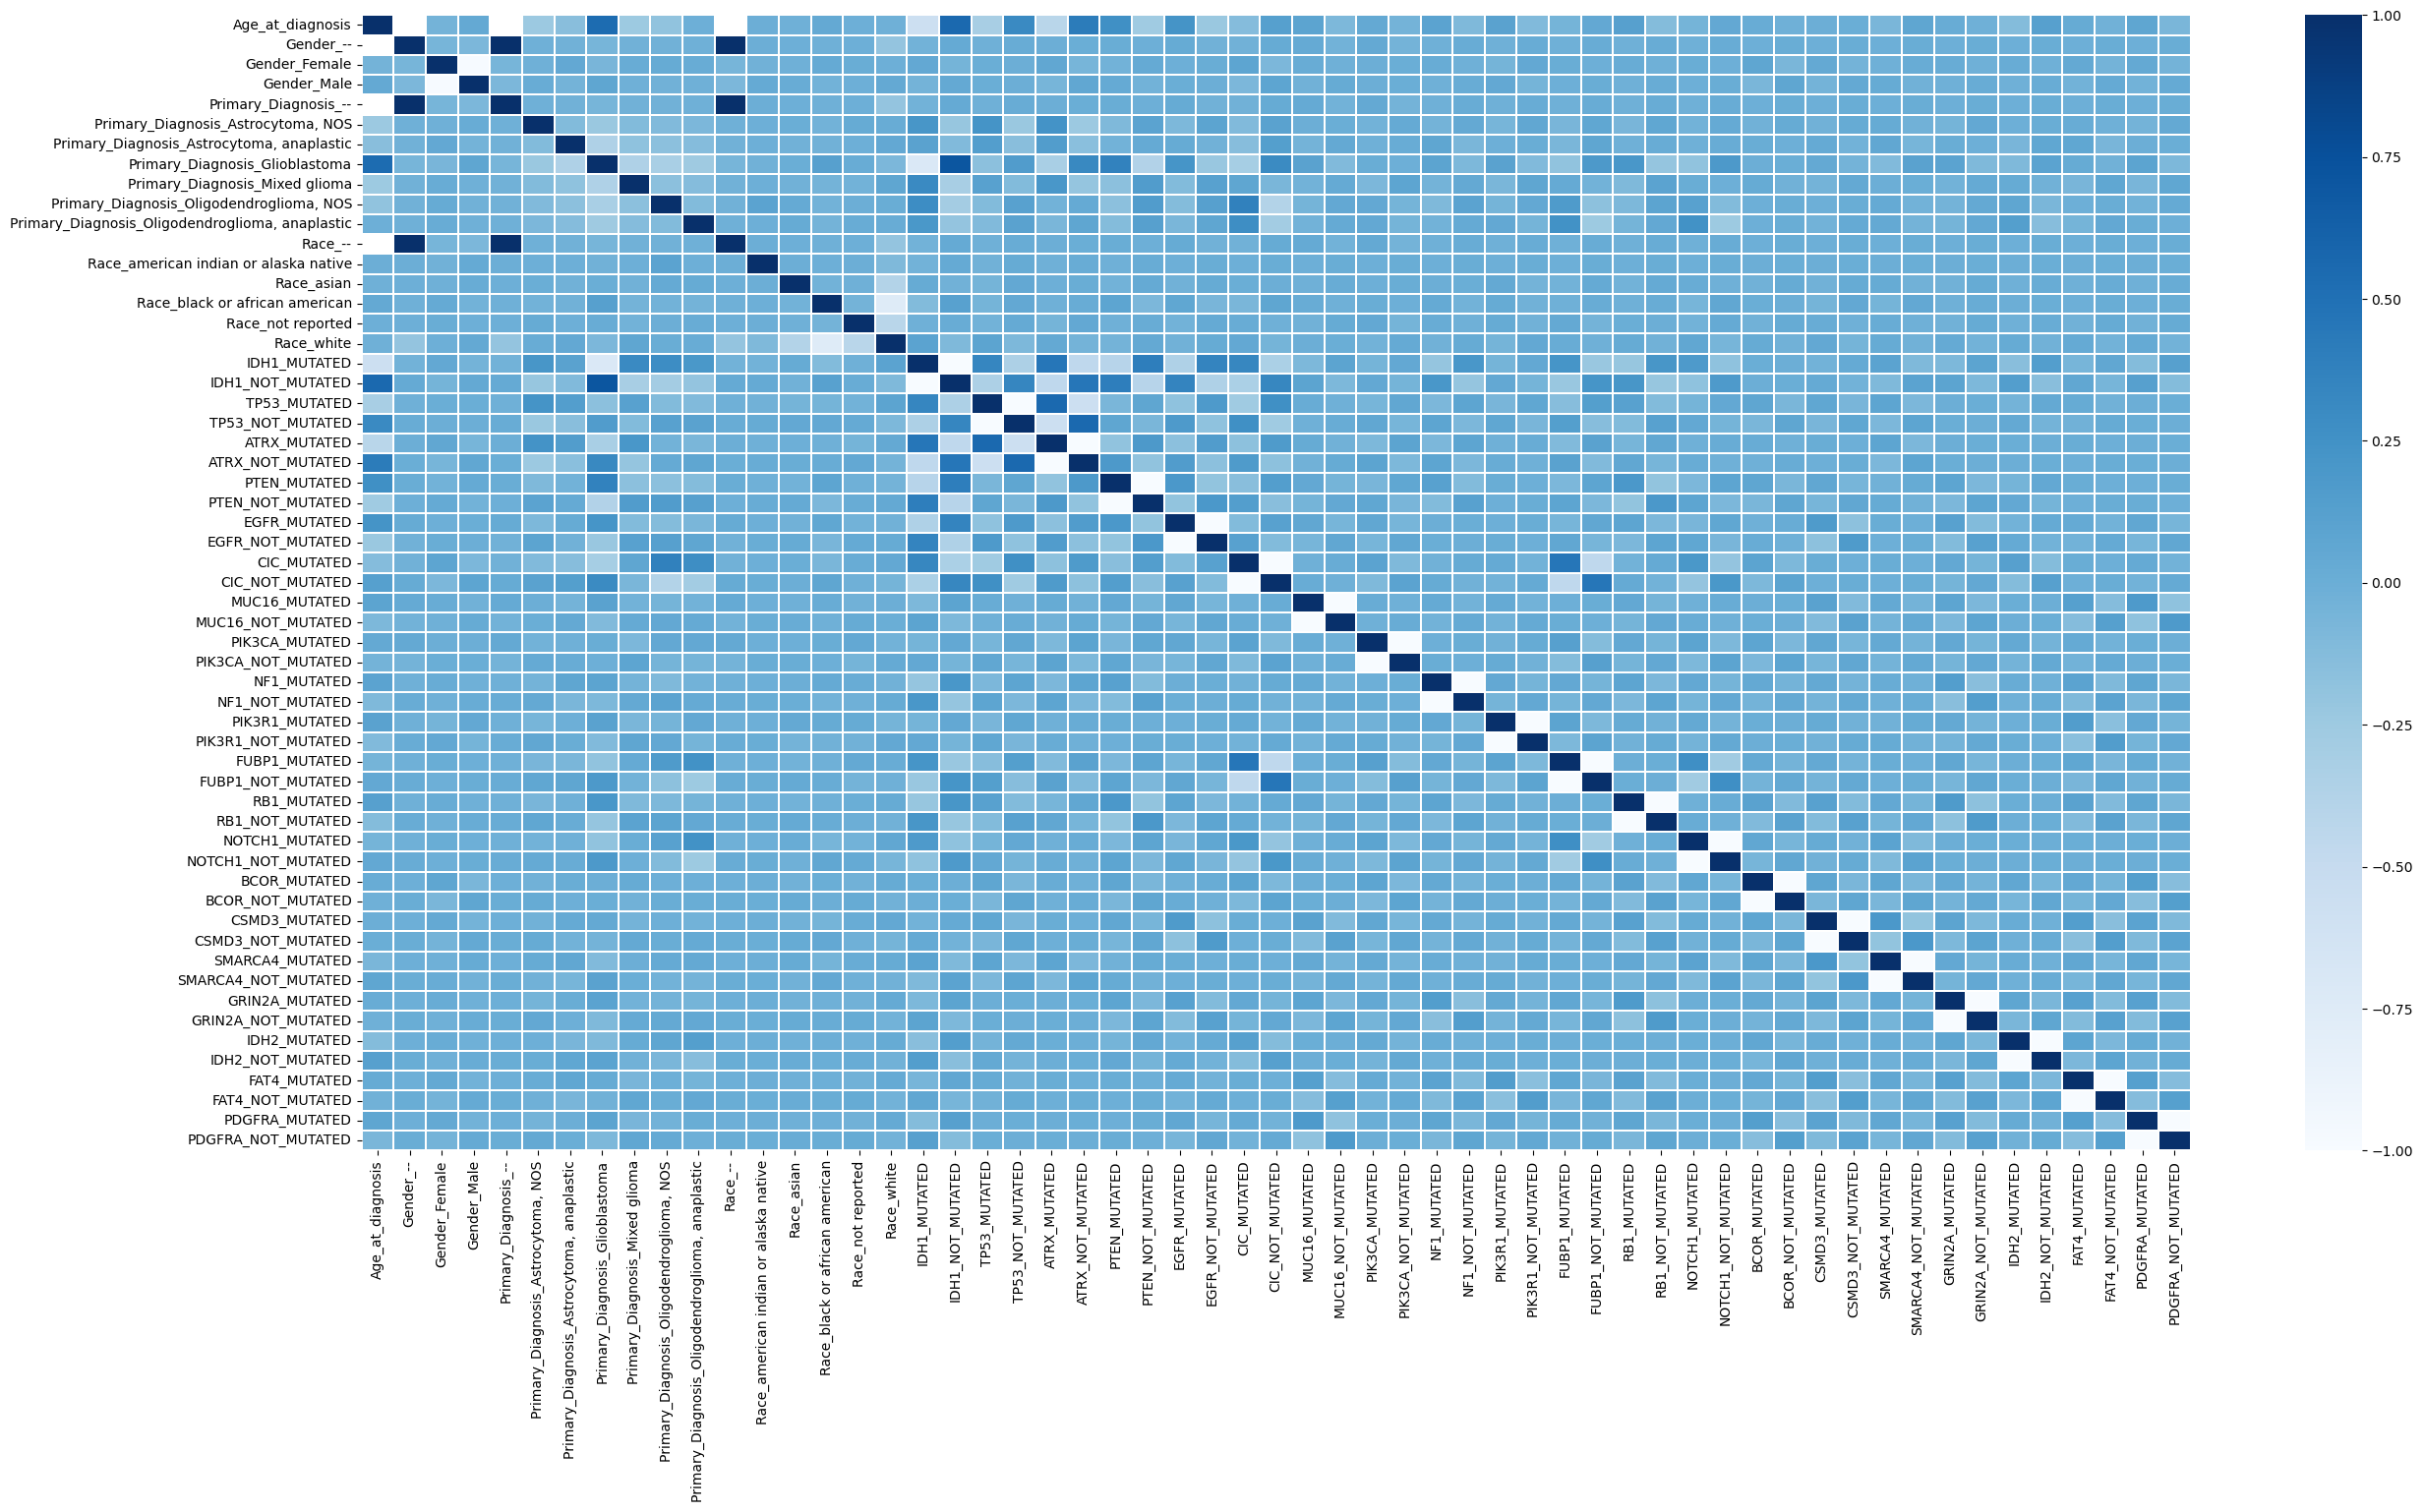

In [16]:
corr=df_encoded.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()
#print(corr)

In [17]:
df_encoded.isnull().sum()



Age_at_diagnosis                                   7
Gender_--                                          0
Gender_Female                                      0
Gender_Male                                        0
Primary_Diagnosis_--                               0
Primary_Diagnosis_Astrocytoma, NOS                 0
Primary_Diagnosis_Astrocytoma, anaplastic          0
Primary_Diagnosis_Glioblastoma                     0
Primary_Diagnosis_Mixed glioma                     0
Primary_Diagnosis_Oligodendroglioma, NOS           0
Primary_Diagnosis_Oligodendroglioma, anaplastic    0
Race_--                                            0
Race_american indian or alaska native              0
Race_asian                                         0
Race_black or african american                     0
Race_not reported                                  0
Race_white                                         0
IDH1_MUTATED                                       0
IDH1_NOT_MUTATED                              

In [18]:
data1.tail()

,Target
770,GBM
771,LGG
772,GBM
773,GBM
774,GBM


In [96]:
Y=data1
X=df_encoded
X.shape

(775, 57)

In [20]:
col_drop=['Gender_--','Primary_Diagnosis_--']
X= X.drop(col_drop, axis=1) # drop the gender column
print(X.columns)

Index(['Age_at_diagnosis', 'Gender_Female', 'Gender_Male',
       'Primary_Diagnosis_Astrocytoma, NOS',
       'Primary_Diagnosis_Astrocytoma, anaplastic',
       'Primary_Diagnosis_Glioblastoma', 'Primary_Diagnosis_Mixed glioma',
       'Primary_Diagnosis_Oligodendroglioma, NOS',
       'Primary_Diagnosis_Oligodendroglioma, anaplastic', 'Race_--',
       'Race_american indian or alaska native', 'Race_asian',
       'Race_black or african american', 'Race_not reported', 'Race_white',
       'IDH1_MUTATED', 'IDH1_NOT_MUTATED', 'TP53_MUTATED', 'TP53_NOT_MUTATED',
       'ATRX_MUTATED', 'ATRX_NOT_MUTATED', 'PTEN_MUTATED', 'PTEN_NOT_MUTATED',
       'EGFR_MUTATED', 'EGFR_NOT_MUTATED', 'CIC_MUTATED', 'CIC_NOT_MUTATED',
       'MUC16_MUTATED', 'MUC16_NOT_MUTATED', 'PIK3CA_MUTATED',
       'PIK3CA_NOT_MUTATED', 'NF1_MUTATED', 'NF1_NOT_MUTATED',
       'PIK3R1_MUTATED', 'PIK3R1_NOT_MUTATED', 'FUBP1_MUTATED',
       'FUBP1_NOT_MUTATED', 'RB1_MUTATED', 'RB1_NOT_MUTATED', 'NOTCH1_MUTATED',
      

In [21]:
#labeling the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y['Target']= label_encoder.fit_transform(Y['Target'])
Y['Target'].unique()

array([0, 1])

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # or 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(X)

In [23]:
from sklearn import metrics
X1=X_imputed

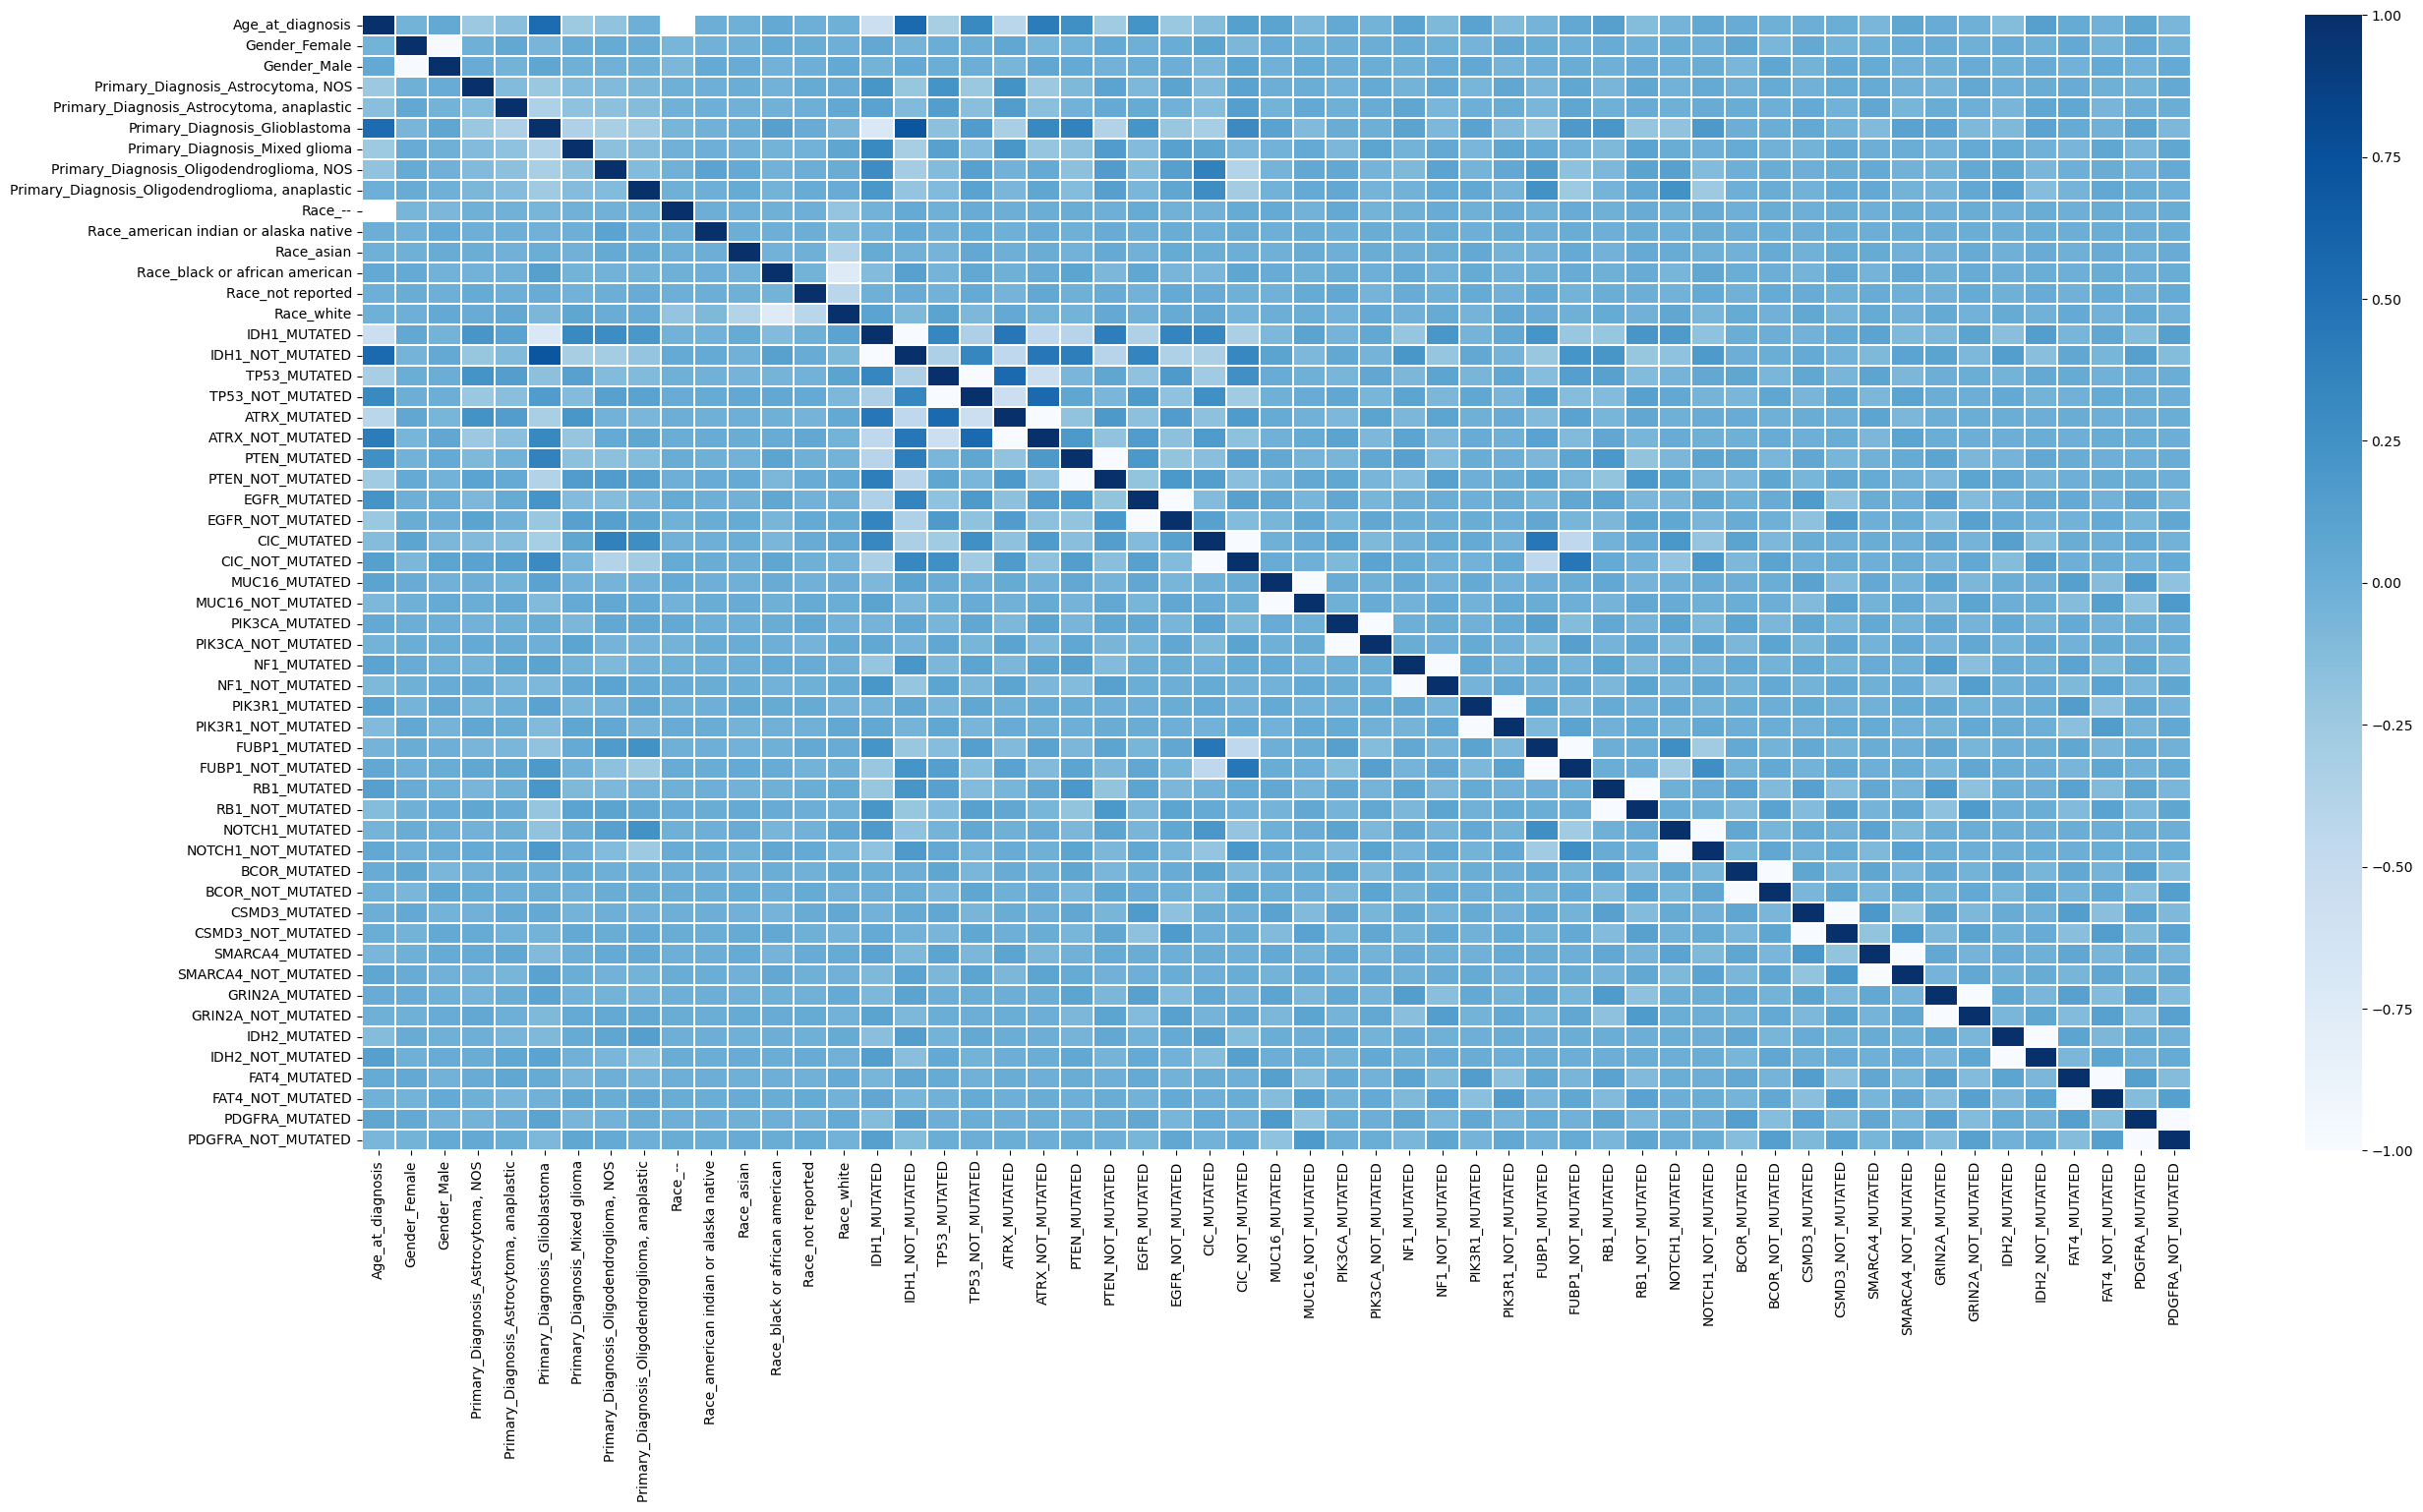

In [24]:
corr=X.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()
#print(corr)

In [25]:
#spliting the training data
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X1,Y,test_size=.25,random_state=42)
X_val1, X_test, y_val1, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)


In [26]:
print(X_val1.shape)

(97, 55)


In [27]:
 # Standardize features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test1)
print(X_train_scaled.shape)

(581, 55)


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('pca', PCA()),
    ('logreg_classifier', LogisticRegression())
])
# Define the parameter grid to search through
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'pca__n_components': [2, 5, 10],  # Adjust the number of components as needed
    'logreg_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg_classifier__penalty': ['l1', 'l2'],
    'logreg_classifier__solver': ['liblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=6, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
LGR = grid_search.best_estimator_
predictions = LGR.predict(X_test_scaled)

# Evaluate the accuracy of the best model
score1= accuracy_score(y_test1, predictions)
print(f'Accuracy of the Best Model: {score1:.2f}')

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best Hyperparameters: {'imputer__strategy': 'mean', 'logreg_classifier__C': 100, 'logreg_classifier__penalty': 'l2', 'logreg_classifier__solver': 'liblinear', 'pca__n_components': 10}
Accuracy of the Best Model: 0.97


C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:

score1= f1_score(y_test1, predictions)
print(f'Accuracy of the Best Model: {score1:.2f}')

y_val_pred1 =LGR.predict(X_val1)
f1_val1 = f1_score(y_val1, y_val_pred1)
print(f"F1 Score on Validation Set: {f1_val1}")
predict1= LGR.predict(X_test1)
score2= f1_score(y_test1, predict1)
print(f'Accuracy of the Best Model: {score2:.2f}')

Accuracy of the Best Model: 0.97
F1 Score on Validation Set: 0.9803921568627451
Accuracy of the Best Model: 0.99


In [30]:
cnf_matrix1 = metrics.confusion_matrix(y_test1, predictions)   # Calculate the confusion matrix
cnf_matrix1

array([[ 79,   3],
       [  3, 109]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc



In [32]:
print(classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        82
           1       0.97      0.97      0.97       112

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



Score :  0.9896907216494846


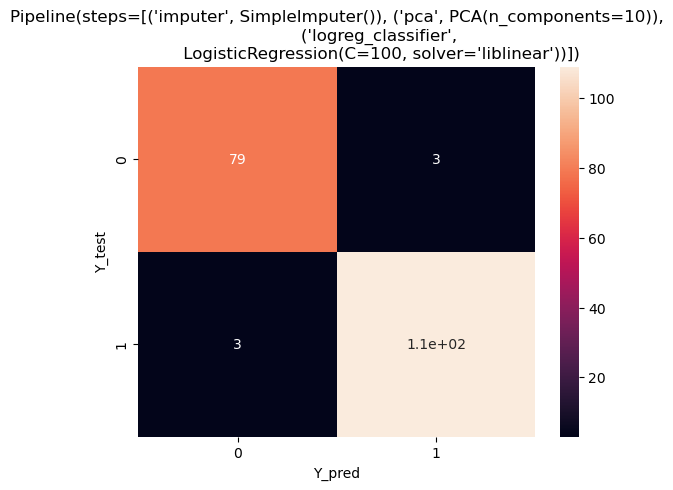

In [33]:
# Plot the confusion matrix
pred_list = [LGR]

for i in pred_list:
    print("Score : ",i.score(X_test1,y_test1))
    y_pred = i.predict(X_test1)
    sns.heatmap(confusion_matrix(y_test1,predictions),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

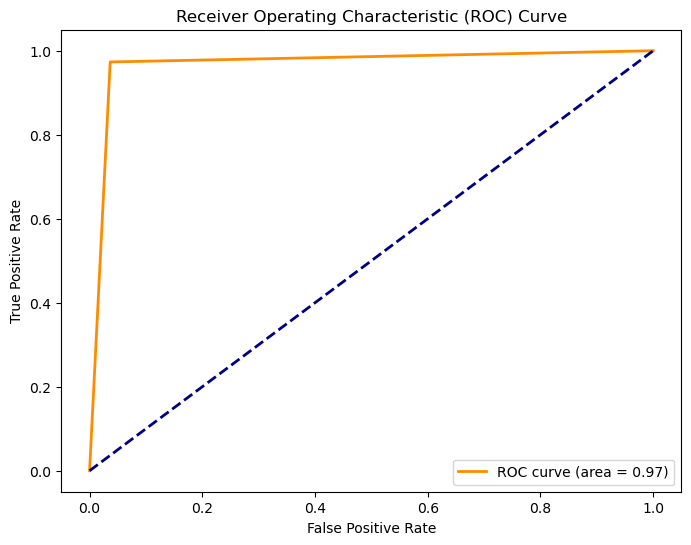

In [34]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('knn_classifier', KNeighborsClassifier())
])

# Define the parameters
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'knn_classifier__n_neighbors': [3, 5, 7, 9,11],
    'knn_classifier__weights': ['uniform', 'distance']
}

#F1 score as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
KNN = grid_search.best_estimator_

# Evaluate on Validation Set
y_val_pred2 = KNN.predict(X_val1)
f1_val2 = f1_score(y_val1, y_val_pred2)
print(f"F1 Score on Validation Set: {f1_val2}")

# Evaluate on Test Set
predictions2 = KNN.predict(X_test1)
f1_test = f1_score(y_test1, predictions2)
print(f"F1 Score on Test Set: {f1_test}")

# Display the best parameters found during grid search
print("Best Parameters:", best_params)

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

F1 Score on Validation Set: 0.9278350515463918
F1 Score on Test Set: 0.9186602870813396
Best Parameters: {'imputer__strategy': 'mean', 'knn_classifier__n_neighbors': 11, 'knn_classifier__weights': 'distance'}


In [36]:
score3 = KNN.score(X_test1, y_test1)   # accuracy for KNN 
print("score",score3 )

score 0.9123711340206185


In [37]:

cnf_matrix3= metrics.confusion_matrix(y_test1, predictions2) # calculate confusion matrix
cnf_matrix3

array([[81,  1],
       [16, 96]], dtype=int64)

In [38]:

print( " Classificaattion report for KNN classifier  \n" , classification_report(y_test1, predictions2))

 Classificaattion report for KNN classifier  
               precision    recall  f1-score   support

           0       0.84      0.99      0.91        82
           1       0.99      0.86      0.92       112

    accuracy                           0.91       194
   macro avg       0.91      0.92      0.91       194
weighted avg       0.92      0.91      0.91       194



Score :  0.9123711340206185


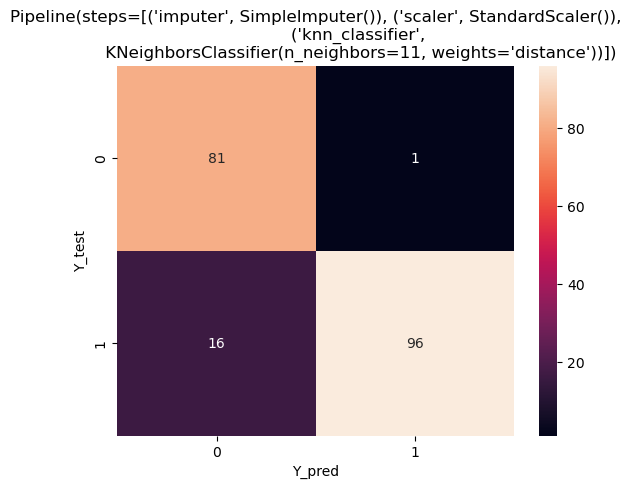

In [39]:
# Plot the confusion matrix
pred_list = [KNN]

for i in pred_list:
    print("Score : ",i.score(X_test1,y_test1))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test1,predictions2),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

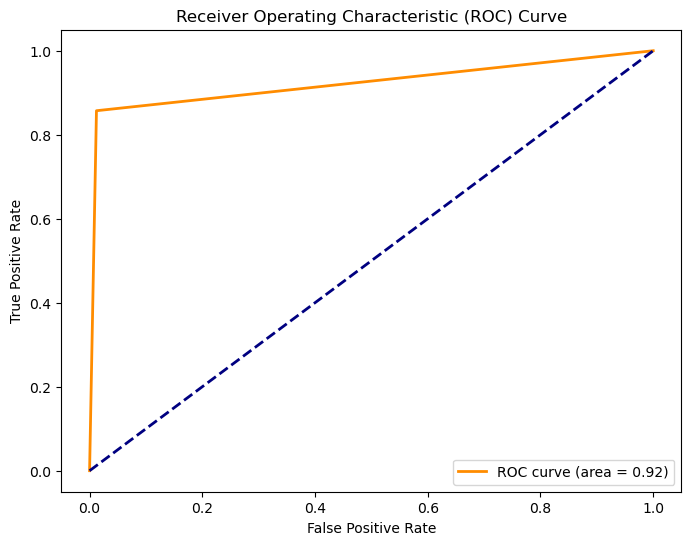

In [40]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, predictions2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X1)

n_components = 2  # Adjust as needed

pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance_ratio)


principal_components = pca.components_
print("Principal Components:", principal_components)


Explained Variance Ratio: [0.10860522 0.07939316]
Cumulative Variance Ratio: [0.10860522 0.18799838]
Principal Components: [[ 0.26186613 -0.03033015  0.02935491 -0.10529903 -0.04499624  0.31400899
  -0.14250618 -0.1190971  -0.08018878  0.00644001  0.00360187 -0.00502974
   0.0633786   0.00832996 -0.0535761  -0.3677238   0.3677238  -0.16621203
   0.16621203 -0.22854881  0.22854881  0.22604374 -0.22604374  0.19623462
  -0.19623462 -0.12778347  0.12778347  0.0628507  -0.0628507   0.01859077
  -0.01859077  0.10280028 -0.10280028  0.04497223 -0.04497223 -0.09232849
   0.09232849  0.12121074 -0.12121074 -0.09358122  0.09358122  0.00397784
  -0.00397784  0.04272904 -0.04272904 -0.04536059  0.04536059  0.07359422
  -0.07359422 -0.00146414  0.00146414  0.04251387 -0.04251387  0.06313836
  -0.06313836]
 [ 0.05850756  0.02778106 -0.02644428 -0.12218143 -0.09365701 -0.05680927
  -0.03233239  0.16368613  0.18648372 -0.00896602  0.00516607  0.01129383
  -0.01974668  0.02420711  0.00109557  0.0172265

In [42]:
X_train, X_test1, y_train, y_test1 = train_test_split(scaled_data,Y,test_size=.25,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
rfc_model = RandomForestClassifier()

#rfc_model = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'rf_classifier__n_estimators': [50, 100, 200],
    'rf_classifier__max_depth': [None, 10, 20],
    'rf_classifier__min_samples_split': [2, 5, 10],
    'rf_classifier__min_samples_leaf': [1, 2, 4],
}

# Create a pipeline with feature selection and the Random Forest model
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(rfc_model, max_features=24)),
    ('rf_classifier', rfc_model)
])

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve Best Parameters and Model
best_params = grid_search.best_params_
best_rfc_model = grid_search.best_estimator_

# Transform the test set using the selected features
X_test_selected = best_rfc_model.named_steps['feature_selection'].transform(X_test1)

# Make predictions on the test set
y_pred = best_rfc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Additional evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'rf_classifier__max_depth': 10, 'rf_classifier__min_samples_leaf': 1, 'rf_classifier__min_samples_split': 2, 'rf_classifier__n_estimators': 100}
Accuracy on Test Set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        60

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

Confusion Matrix:
[[37  0]
 [ 0 60]]


In [49]:
y_pred = best_rfc_model.predict(X_test1)

# Evaluate the model
accuracy = f1_score(y_test1, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Additional evaluation metrics
print('Classification Report:')
print(classification_report(y_test1, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test1, y_pred))

Best Parameters: {'rf_classifier__max_depth': 10, 'rf_classifier__min_samples_leaf': 1, 'rf_classifier__min_samples_split': 2, 'rf_classifier__n_estimators': 100}
Accuracy on Test Set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00       112

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

Confusion Matrix:
[[ 82   0]
 [  0 112]]


In [ ]:
# Evaluate on Validation Set
y_val_pred =RFC.predict(X_val)
f1_val = f1_score(y_val, y_val_pred)
print(f"F1 Score on Validation Set: {f1_val}")


# Evaluate on Test Set
y_test_pred =RFC.predict(X_test1)
f1_test = f1_score(y_test1, y_test_pred)
print(f"F1 Score on Test Set: {f1_test}")

# Display the best parameters found during grid search
print("Best Parameters:", best_params)


In [ ]:
# calculate confusion matrix
cnf_matrix4 = metrics.confusion_matrix(y_test1, y_test_pred)
cnf_matrix4

In [ ]:

print( " Classification report for Random Forest Classifier \n" , classification_report(y_test1,y_test_pred))

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1,y_test_pred )
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('dt_classifier', DecisionTreeClassifier())
])

# Define the parameter grid to search
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'dt_classifier__max_depth': [None, 10, 20],
    'dt_classifier__min_samples_split': [2, 5, 10],
    'dt_classifier__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with F1 score as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Retrieve Best Parameters and Model
best_params = grid_search.best_params_
best_dtc_model = grid_search.best_estimator_

X_test_selected = best_dtc_model.named_steps['feature_selection'].transform(X_test1)

# Make predictions on the test set
y_pred = DTC.predict(X_test_selected)

# Evaluate the model
accuracy = f1_score(y_test1, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Additional evaluation metrics
print('Classification Report:')
print(classification_report(y_test1, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test1, y_pred))
# Extract feature importances from the best model
feature_importances = best_pipeline.named_steps['dt_classifier'].feature_importances_

# Visualize feature importances
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Decision Tree Feature Importances')
plt.show()

# Evaluate on Validation Set
y_val_pred = best_pipeline.predict(X_val)
f1_val = f1_score(y_val, y_val_pred)
print(f"F1 Score on Validation Set: {f1_val}")

# Evaluate on Test Set
y_test_pred = best_pipeline.predict(X_test1)
f1_test = f1_score(y_test1, y_test_pred)
print(f"F1 Score on Test Set: {f1_test}")

# Display the best parameters found during grid search
print("Best Parameters:", best_params)

KeyError: 'feature_selection'

In [54]:
dtc = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dtc_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_dtc_model.score(X_test1, y_test1)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 1.0


In [56]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
svm_classifier = SVC()

rfe = RFE(estimator=svm_classifier, n_features_to_select=24)
X_selected = rfe.fit_transform(X_train, y_train)
# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
SVM = grid_search.best_estimator_
y_pred = SVM.predict(X_test1)
accuracy=SVM.score(X_test1, y_test1)
print("Accuracy on Test Set:", accuracy)



C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [57]:
svm_model = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Retrieve Best Parameters and Model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Additional evaluation metrics
print('Classification Report:')
print(classification_report(y_test1, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test1, y_pred))

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on Test Set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00       112

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

Confusion Matrix:
[[ 82   0]
 [  0 112]]


C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('svm_classifier', SVC(kernel='linear'))
])

#
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'svm_classifier__C': [0.1, 1, 10],
}

# Perform Grid Search with F1 score as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Apply RFE for feature selection
svm_classifier = best_pipeline.named_steps['svm_classifier']
rfe = RFE(estimator=svm_classifier, n_features_to_select=56)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_val_selected = rfe.transform(X_val)
X_test_selected = rfe.transform(X_test1)

# Train SVM on the selected features
svm_classifier_selected = SVC(**best_params['svm_classifier'])
svm_classifier_selected.fit(X_train_selected, y_train)

# Evaluate on Validation Set
y_val_pred = svm_classifier_selected.predict(X_val_selected)
f1_val = f1_score(y_val, y_val_pred)
print(f"F1 Score on Validation Set: {f1_val}")

# Evaluate on Test Set
y_test_pred = svm_classifier_selected.predict(X_test_selected)
f1_test = f1_score(y_test1, y_test_pred)
print(f"F1 Score on Test Set: {f1_test}")

# Display the best parameters found during grid search
print("Best Parameters:", best_params)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)


print("Accuracy on Test Set:", accuracy)

In [58]:
test_data=pd.read_csv(r"C:\Users\xghostrider\Downloads\ML_project\test_data.csv",header=None)

In [59]:
test_data.shape

(88, 24)

In [60]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
1,Male,54 years 216 days,Glioblastoma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Female,44 years 90 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Male,59 years 275 days,"Astrocytoma, anaplastic",white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,Male,64 years 50 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Male,59 years 64 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
84,Male,63 years 307 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
85,Male,25 years 232 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
86,Male,52 years 192 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [61]:
column_names = test_data.iloc[0]  # Assuming your_data is a pandas DataFrame

# Set the column names of the existing DataFrame
test_data.columns = column_names

# Drop the first row from the DataFrame (since it's now the column names)
test_data1 = test_data.iloc[1:]

# Print the modified DataFrame
print(test_data1)

0   Gender   Age_at_diagnosis              Primary_Diagnosis   Race  \
1     Male  54 years 216 days                   Glioblastoma  white   
2   Female   44 years 90 days        Astrocytoma, anaplastic  white   
3     Male  59 years 275 days        Astrocytoma, anaplastic  white   
4     Male   64 years 50 days                   Glioblastoma  white   
5     Male   46 years 42 days         Oligodendroglioma, NOS  white   
..     ...                ...                            ...    ...   
83    Male   59 years 64 days                   Glioblastoma  white   
84    Male  63 years 307 days                   Glioblastoma  white   
85    Male  25 years 232 days         Oligodendroglioma, NOS  white   
86    Male  52 years 192 days  Oligodendroglioma, anaplastic  white   
87  Female  52 years 288 days                   Glioblastoma  white   

0          IDH1         TP53         ATRX         PTEN         EGFR  \
1       MUTATED      MUTATED      MUTATED  NOT_MUTATED      MUTATED   
2    

In [62]:
test_data1.columns

Index(['Gender', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race', 'IDH1',
       'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object', name=0)

In [63]:
test_data1['Age_at_diagnosis'] = test_data1['Age_at_diagnosis'].apply(convert_age_str_to_float)

C:\Users\xghostrider\AppData\Local\Temp\ipykernel_16088\1386125974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Age_at_diagnosis'] = test_data1['Age_at_diagnosis'].apply(convert_age_str_to_float)


In [64]:
test_data1.head()

,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
1,Male,54.554415,Glioblastoma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Female,44.216290,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Male,59.712526,"Astrocytoma, anaplastic",white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,Male,64.093087,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
5,Male,46.083504,"Oligodendroglioma, NOS",white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED


In [65]:
# Use get_dummies() to one-hot encode the specified columns
columns_to_encode1 = ['Gender','Race', 'IDH1','Primary_Diagnosis',
       'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
test_data2 = pd.get_dummies(test_data1, columns=columns_to_encode1)

# Display the resulting DataFrame
print(test_data2.head())
test_data2=test_data2.astype(float)

# Display the resulting DataFrame
print(test_data2.head(4))

   Age_at_diagnosis  Gender_Female  Gender_Male  \
1         54.554415          False         True   
2         44.216290           True        False   
3         59.712526          False         True   
4         64.093087          False         True   
5         46.083504          False         True   

   Race_black or african american  Race_not reported  Race_white  \
1                           False              False        True   
2                           False              False        True   
3                           False              False        True   
4                           False              False        True   
5                           False              False        True   

   IDH1_MUTATED  IDH1_NOT_MUTATED  Primary_Diagnosis_Astrocytoma, NOS  \
1          True             False                               False   
2          True             False                               False   
3         False              True                               F

In [66]:
data2.columns

Index(['Gender', 'Age_at_diagnosis', 'Primary_Diagnosis', 'Race', 'IDH1',
       'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')

In [67]:
col_drop=['Primary_Diagnosis']
X_3= data2.drop(col_drop, axis=1) # drop the gender column
print(X_3.columns)

Index(['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN',
       'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1',
       'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')


In [68]:
columns_to_encode = ['Gender','Race', 'IDH1',
       'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Use get_dummies() to one-hot encode the specified columns
df_encoded2 = pd.get_dummies(X_3, columns=columns_to_encode)

# Display the resulting DataFrame
print(df_encoded2.head())


   Age_at_diagnosis  Gender_--  Gender_Female  Gender_Male  Race_--  \
0         36.802190      False           True        False    False   
1         25.196441      False           True        False    False   
2         62.565366      False          False         True    False   
3         69.117043      False           True        False    False   
4         43.411362      False           True        False    False   

   Race_american indian or alaska native  Race_asian  \
0                                  False       False   
1                                  False       False   
2                                  False       False   
3                                  False       False   
4                                  False       False   

   Race_black or african american  Race_not reported  Race_white  ...  \
0                           False              False        True  ...   
1                           False              False        True  ...   
2                

In [69]:
X_3.head()

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,Female,36.802190,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,Female,25.196441,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Male,62.565366,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Female,69.117043,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,Female,43.411362,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [70]:
df_encoded3 = df_encoded2.astype(float)

# Display the resulting DataFrame
print(df_encoded3.head(4))

   Age_at_diagnosis  Gender_--  Gender_Female  Gender_Male  Race_--  \
0         36.802190        0.0            1.0          0.0      0.0   
1         25.196441        0.0            1.0          0.0      0.0   
2         62.565366        0.0            0.0          1.0      0.0   
3         69.117043        0.0            1.0          0.0      0.0   

   Race_american indian or alaska native  Race_asian  \
0                                    0.0         0.0   
1                                    0.0         0.0   
2                                    0.0         0.0   
3                                    0.0         0.0   

   Race_black or african american  Race_not reported  Race_white  ...  \
0                             0.0                0.0         1.0  ...   
1                             0.0                0.0         1.0  ...   
2                             0.0                0.0         1.0  ...   
3                             0.0                0.0         1.0  ...  

In [71]:
#df_encoded3= df_encoded3.drop('Gender_--', axis=1)
df_encoded3= df_encoded3.drop('Race_--', axis=1)

In [72]:
X3=df_encoded3
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # or 'median', 'most_frequent', etc.
X_imputed1 = imputer.fit_transform(X3)

In [73]:
X3=X_imputed1

In [74]:
X_train1, X_test2, y_train1, y_test2 = train_test_split(X3,Y,test_size=.25,random_state=42)
X_val2, X_test, y_val2, y_test = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)

In [75]:
LGR.fit(X_train1,y_train1)

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imputer', SimpleImputer()), ('pca', PCA(n_components=10)),
                ('logreg_classifier',
                 LogisticRegression(C=100, solver='liblinear'))])

In [76]:
predictions = LGR.predict(X_test2)

# Evaluate the accuracy of the best model
score1= f1_score(y_test2, predictions)
print(f'Accuracy of the LGR Model after droping Primary diagnosis: {score1:.2f}')

Accuracy of the LGR Model after droping Primary diagnosis: 0.87


In [77]:

print( " Classificaattion report for LGR classifier  \n" , classification_report(y_test1, predictions))

 Classificaattion report for LGR classifier  
               precision    recall  f1-score   support

           0       0.78      0.93      0.84        82
           1       0.94      0.80      0.87       112

    accuracy                           0.86       194
   macro avg       0.86      0.87      0.85       194
weighted avg       0.87      0.86      0.86       194



In [78]:
KNN.fit(X_train1,y_train1)

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knn_classifier',
                 KNeighborsClassifier(n_neighbors=11, weights='distance'))])

In [79]:
predictions2 = KNN.predict(X_test2)

# Evaluate the accuracy of the best model
score1= f1_score(y_test2, predictions2)
print(f'Accuracy of the KNN Model after droping Primary diagnosis: {score1:.2f}')

Accuracy of the KNN Model after droping Primary diagnosis: 0.79


In [80]:

print( " Classificaattion report for KNN classifier  \n" , classification_report(y_test1, predictions2))

 Classificaattion report for KNN classifier  
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        82
           1       0.86      0.74      0.79       112

    accuracy                           0.78       194
   macro avg       0.78      0.79      0.78       194
weighted avg       0.79      0.78      0.78       194



In [83]:
 best_rfc_model.fit(X_train1,y_train1)

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 max_features=24)),
                ('rf_classifier', RandomForestClassifier(max_depth=10))])

In [84]:
predictions3 =  best_rfc_model.predict(X_test2)

# Evaluate the accuracy of the best model
score1= f1_score(y_test2, predictions3)
print(f'Accuracy of the rfc Model after droping Primary diagnosis: {score1:.2f}')

Accuracy of the rfc Model after droping Primary diagnosis: 0.84


In [85]:

print( " Classificaattion report for RFC classifier  \n" , classification_report(y_test2, predictions3))

 Classificaattion report for RFC classifier  
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        82
           1       0.90      0.79      0.84       112

    accuracy                           0.83       194
   macro avg       0.83      0.84      0.83       194
weighted avg       0.84      0.83      0.83       194



In [86]:
 best_dtc_model.fit(X_train1,y_train1)

DecisionTreeClassifier(random_state=42)

In [90]:
predictions4= best_dtc_model.predict(X_test2)
score1= f1_score(y_test2, predictions3)
print(f'Accuracy of the DTc Model after droping Primary diagnosis: {score1:.2f}')

Accuracy of the DTc Model after droping Primary diagnosis: 0.82


In [91]:

print( " Classificaattion report for DTC classifier  \n" , classification_report(y_test2, predictions4))

 Classificaattion report for DTC classifier  
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        82
           1       0.86      0.79      0.82       112

    accuracy                           0.80       194
   macro avg       0.80      0.81      0.80       194
weighted avg       0.81      0.80      0.81       194



In [92]:
 best_svm_model.fit(X_train1,y_train1)

C:\Users\xghostrider\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

In [93]:
predictions5= best_svm_model.predict(X_test2)
score1= f1_score(y_test2, predictions5)
print(f'Accuracy of the SVM Model after droping Primary diagnosis: {score1:.2f}')

Accuracy of the SVM Model after droping Primary diagnosis: 0.86


In [94]:

print( " Classificaattion report for SVM classifier  \n" , classification_report(y_test2, predictions5))

 Classificaattion report for SVM classifier  
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        82
           1       0.97      0.78      0.86       112

    accuracy                           0.86       194
   macro avg       0.86      0.87      0.86       194
weighted avg       0.88      0.86      0.86       194

